# 例3

簡単な例の3つ目を考えてみる。今までのモデルの主眼にあった考えは、人を選ぶ確率とそのうえで意見が選ばれる確率は独立であるというものであった。しかし、これまで考えたように、単にそのようなモデルを考えただけだと人数の効果をうまく反映できないように思える。したがって、次に考えるモデルは、人がそれぞれ意見をもっており、前の発言に関して意見が近い、または反対意見を持っている時にはその意見をもつ人が発言する確率が高い、というようなものを考える。

アルゴリズムとしては、はじめに参加者たち$P=\{i\ |\ i = 0, 1, 2,\cdots , n-1\}$はそれぞれに独自の$s_{i}$個の意見を持っているとする。このときの意見$X$は状態空間$S$上のある一点を指しており、ベクトルで記述されるようなものである。意見すべての集合は互いに重なりあうことはなく(全く同じ点に異なる人の意見が存在することはない。)、それぞれが異なる分布を持っていてもよい。はじめに議題、すなわち時刻$0$における意見が作られ、次に時刻1では、それぞれの参加者の意見のうちから、一番その意見によって発言されやすいものをそれぞれ一つずつ選ぶ。これを大きい順に並べ替えて、一番発言しやすい人に発言の機会が生まれる。それぞれの人には発言力が割り当てられており、その値によって確率的に発言するかどうかが決まる。すなわち、意見の強さが試行の順番を決め、自分の番が回ってきたときの発言の確率は一定であるという場面を考えている。また別の方法としては、この発言力と意見のしやすさを合わせた指標で発言するかどうかを決めるという方法があるが、まずは簡単のために、はじめのそれぞれが自分の中で一番いい意見を持ち寄り、その順番に発言の権利が与えられていくような場面を考えることにする。また、最終的に誰も発言できない場合もあるので、そのときには沈黙があったとして時間は1進めて同じ意見について先程と同じ試行を繰り返すこととする。

また、以前の意見が次の発言の意見にどう影響するかの考え方にもいくつかの候補が考えられる。

単純な順に並べていくことにすると、

1. 影響なし(独立)
2. 議題
3. 一つ前の意見
4. 一つ前の意見 + 議題
5. 二つ前までの意見
6. 二つ前までの意見 + 議題
7. それ以上前の意見

## 1の場合

1の場合には意見の質を測るものはなくなってしまうので、意見の選び方はランダムになっていると見てもよい。そうすると、発言の順番は単なる組み合わせになり、人$i$が$r+1$($r = 1, 2, \cdots , n-1$)番目に発言する権利を得たとき、自分までその権利が回ってくる確率は、以下のように期待値であらわすことが出来る。

$$p_{r+1}(i) = \frac{\sum_{<j_{0}, \cdots ,j_{r-1}>_{r} = J}\prod_{j\in J}(1-P_{j})}{_{n-1}C_{r}}$$

ここで$J = <j_{0}, j_{1}, \cdots ,j_{r-1}>_{r}$は、$i$を除く$n-1$個の要素から$r$個取り出したときの人の組み合わせのうちの1つのパターンをあらわすことにする($j_{0}$などはその実際の値をあらわす)。このときどの組み合わせが起こる確率も等しいので、その$J$すべてに対して和をとって、その組み合わせのパターンの数$_{n-1}C_{r}$で割ることで期待値を求めることができている。

また、

$$p_{0}(i) = 1$$

である。

人$i$が発言権の順番で$r$番目になる確率は等しいわけなので、したがって$r$に対しても平均をすることができて、

$$p(i) = \frac{\sum_{r=0}^{n}p_{r}(i)P_{i}}{n}.$$

このとき得られた確率は人$i$によって異なり、毎時刻ごとにその確率でそれぞれの人が発言する確率があるということになる。沈黙の(平均的な)確率は

$$p(s) = 1- \sum_{i}p(i)$$

である。

このように整理すれば、各時刻でそれぞれの人が意見を発言する確率が求められるので、簡単な確率過程に帰着できた。

## 2、3の場合

次に2、または3の場合について考える。どちらの場合も参照とするデータは一つだけであるという点で共通であり、違いはそのデータが時系列にしたがって変化するかという点だけである。

シミュレーションの設定を考える。

意見は$a$次元上の一点であり、意見が近い場合に発言されやすいと考えることにする。意見の近さは、ユークリッド距離

$$d(x, y) = \sqrt{(x_{1}-y_{1})^{2} + (x_{2} -y_{2})^{2} + \cdots +(x_{a}-y_{a})^{2}}$$

の大小で測ることにする。

In [83]:
from IPython.display import HTML
HTML('<iframe src=case_2and3.html width=100% height=350></iframe>')

In [1]:
%matplotlib inline
import numpy as np
from scipy.spatial.distance import euclidean as euc
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
from mpld3.utils import get_id


class Person:

    def __init__(self, S, a, p=0.5):
        self.S = S
        self.a = a
        self.p = p

    def gather(self):
        """make person to participate the meeting.
        """
        self.ideas = self.has_idea()

    def has_idea(self):
        """a person has self.S ideas with self.a dimension.
        """
        return list(np.random.rand(self.S, self.a))

    def chose_idea(self, idea):
        if len(self.ideas) == 0:
            return False
        # return min(d) and its idea_id
        return min([(euc(vec, idea), idea_id) for idea_id, vec in enumerate(self.ideas)])


class Meeting:

    """Simulate a meeting with "simple3" situation.

    Give keyword arguments:

        K = 20 # Time limit
        N = 6 # a number of participants
        S = 10 # a number of ideas for each participants
        a = 2 # the dimension of an idea
        p = 0.5 # probability that a person speak
        draw = True # draw image or don't

    Output:

        self.minutes: list of
                      ( idea(which is vector with a dimension)
                      , who(person_id in the list "self.membes"))
        self.k: stopped time (=len(self.minutes))
    """

    def __init__(self, K=20, N=6, S=10, a=2, p=0.5, draw=True, case=2):
        self.K = K
        self.N = N
        self.S = S
        self.a = a
        self.p = p
        self.draw = draw
        self.case = case  # case in the above cell: 2 or 3
        self.members = []
        self.minutes = []  # list of (idea, who)
        self.k = 0

    def gather_people(self):
        """gather people for the meeting.

        You can edit what ideas they have in here.
        """
        for n in range(self.N):
            person = Person(self.S, self.a, self.p)
            # person.has_idea = some_function()
            # some_function: return list of self.S arrays with dim self.a.
            person.gather()
            self.members.append(person)

    def progress(self):
        """meeting progress
        """
        self.init()
        preidea = self.subject
        self.k = 1
        while self.k < self.K + 1:
            # l: (distance, speaker, idea_id) list for who can speak
            l = []
            for person_id, person in enumerate(self.members):
                # chosed: (distance, idea_id)
                chosed = person.chose_idea(preidea)
                if chosed:
                    l.append((chosed[0], person_id, chosed[1]))
            # if no one can speak: meeting ends.
            if len(l) == 0:
                print "no one can speak."
                break
            i = [(person_id, idea_id)
                 for distance, person_id, idea_id in sorted(l)]

            for person_id, idea_id in i:
                rn = np.random.rand()
                if rn < self.members[person_id].p:
                    idea = self.members[person_id].ideas.pop(idea_id)
                    self.minutes.append((idea, person_id))
                    if self.case == 3:
                        preidea = idea
                    self.callback()
                    self.k += 1
                    break
            else:
                self.minutes.append((self.subject, self.N))
                self.callback()
                self.k += 1

        self.after()

    def init(self):
        self.gather_people()
        self.subject = np.random.rand(self.a)
        self.minutes.append((self.subject, self.N))
        if self.draw:
            self.fig = plt.figure(figsize=(9, 9))
            self.ax = self.fig.add_subplot(1, 1, 1)
            self.labels = ['subject']
            self.s1 = [self.ax.scatter(self.subject[0], self.subject[1],
                                       c=next(self.ax._get_lines.color_cycle))]
            self.ax.text(
                self.subject[0], self.subject[1], '0', fontsize=5)
            for i, member in enumerate(self.members):
                x = [vec[0] for vec in member.ideas]
                y = [vec[1] for vec in member.ideas]
                s = self.ax.scatter(
                    x, y, c=next(self.ax._get_lines.color_cycle), alpha=0.2)
                self.labels.append(str(i))
                self.s1.append(s)

    def callback(self):
        if self.draw:
            if self.minutes[-1][1] == self.N or self.minutes[-2][1] == self.N:
                alpha = 0.2
            else:
                alpha = 1.0
            ix = self.minutes[-2][0][0]
            iy = self.minutes[-2][0][1]
            jx = self.minutes[-1][0][0]
            jy = self.minutes[-1][0][1]
            l1 = self.ax.plot([ix, jx], [iy, jy], color='black', alpha=alpha)
            self.ax.text(jx, jy, '%d' % self.k, color='blue', fontsize=12)
        else:
            pass

    def after(self):
        if self.draw:
            plugins.connect(
                self.fig, plugins.InteractiveLegendPlugin(
                    self.s1, self.labels, ax=self.ax))
            mpld3.enable_notebook()
        else:
            print meeting.minutes

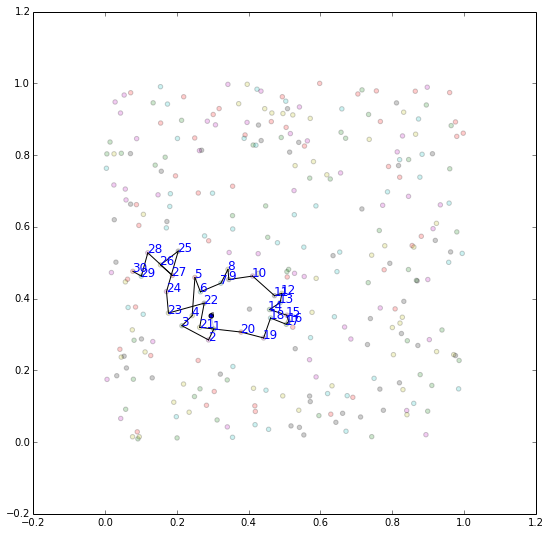

In [3]:
meeting = Meeting(K=30, N=6, S=50, a=2, p=.6, case=3)
meeting.progress()

以下に観察から得られる定性的な性質をまとめてみる。

$S$を大きくすると、意見の密度を増加させるため、発言された意見の描く軌跡の範囲は小さくなる。

Note:"意見の描く軌跡の範囲"をどう数値化する?
- 各座標軸における最小値、最大値で描かれる$a$次元立方体の体積?
- すべての座標軸に対しての分散?
- 慣性半径?

$p$を大きくするほどより直線的(?)な軌道となる。$p$が小さい時には軌跡はより"ギザギザ"しており、線が重なったり、沈黙で中断されて島になったりする部分が多く現れるようになる。

$K$の値を大きくするほど、最後に選ばれた点の座標は開始座標よりも遠くなる。

適当な$S$や$N$を考えたときには自己排他的な2次元のランダムウォークに近くなるのかもしれない。

TODO: 描画を切って上の性質を確かめる